In [49]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import os
fig_cm = 1/2.54
fig_mm = 1/25.4

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/yihanwang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [21]:
d = np.loadtxt('stat-modified/full-0-19.txt')
stat = d[:,0]
time = d[:,6]
extend = d[:,7]


In [23]:
print((extend == 1).sum(), (stat == 9).sum())

2984 2587


In [2]:
def load_data(filename):
    d = np.loadtxt(filename)
    dic = {}
    dic['fate'] = d[:,0]
    dic['a2'] = d[:,1]
    dic['nu1'] = d[:,2]
    dic['nu2'] = d[:,3]
    dic['b'] = d[:,4]
    dic['a'] = d[:,5]
    dic['e'] = d[:,6]
    return dic

In [ ]:
import numpy as np
M1 = 1
M2 = 1
m = 1e-3
N = 20
f1min = -1
f1max = 1
f2min = 0.3
f2max = np.sqrt(1 - 2 * (2 * m / 3 / M1)**( 1.0 / 3))
f1 = 10**np.linspace(f1min,f1max,N)
f2 = np.linspace(f2min,f2max,N)
x,y=np.meshgrid(f1,f2)
z1 = np.zeros(x.shape)
z2 = np.zeros(x.shape)
a2 = 10
prefix = 'run1/'
for i in range(N):
    for j in range(N):
        fname = prefix+'full-'+str(i)+'-'+str(j)+'.txt'
        d = np.loadtxt(fname)
        stat = d[:,0]
        bmax = d[0,1]
        b = d[:,2]
        ap = d[:,3]
        ep = d[:,4]
        sigffb = np.pi * bmax**2 * (stat==9).sum()/len(b)/a2**2
        sigffs = np.pi * bmax**2 * ((stat==1).sum() + (stat==2).sum() + (stat==5).sum() + (stat==6).sum()+2*(stat==8).sum())/len(b)/a2**2
        z1[j,i] = sigffs
        z2[j,i] = sigffb
        
np.savetxt(prefix+'x.txt',x)
np.savetxt(prefix+'y.txt',y)
np.savetxt(prefix+'z1.txt',z1)
np.savetxt(prefix+'z2.txt',z2)

In [249]:
import numpy as np
M1 = 1
M2 = 1
m = 1e-3
N = 20
f1min = -1
f1max = 1
f2min = 0.3
f2max = np.sqrt(1 - 2 * (2 * m / 3 / M1)**( 1.0 / 3))
f1 = 10**np.linspace(f1min,f1max,N)
f2 = np.linspace(f2min,f2max,N)
x,y=np.meshgrid(f1,f2)
sigma_s = np.zeros(x.shape)
sigma_b = np.zeros(x.shape)
a_b = np.zeros(x.shape)
e_b = np.zeros(x.shape)
a_std = np.zeros(x.shape)
e_std = np.zeros(x.shape)
v_ej = np.zeros(x.shape)
v_std = np.zeros(x.shape)
nfa=np.zeros(x.shape)
nfe=np.zeros(x.shape)
nfv = np.zeros(x.shape)
nfastd=np.zeros(x.shape)
nfestd=np.zeros(x.shape)
nfvstd=np.zeros(x.shape)
a2 = 10

num_file = 1

for i in range(num_file):
    print(i)
    dd = np.loadtxt('stat-modified/stat'+str(i+1)+'.txt')
    #dd = np.loadtxt('fullstat4/stat'+str(i+1)+'.txt')
    for i in range (400):
        line = dd[i,:]
        idx1 = int(line[0])
        idx2 = int(line[1])
    #print(idx1,idx2)
        bmax = line[2]
        aave = line[3]
        astd = line[4]
        eave = line[5]
        estd = line[6]
        N = line[7]
        ns = line[10] + line[11] + line[14] + line[15] + 2*line[17]
        nb = line[18]
        #vave = line[19]
        #vstd = line[20]

        sigma_s[idx2,idx1] += ns*np.pi*bmax**2/a2**2/(N*num_file)
        sigma_b[idx2,idx1] += nb*np.pi*bmax**2/a2**2/(N*num_file)
   
        if np.isfinite(aave):
            a_b[idx2,idx1] += aave
            nfa[idx2,idx1] += 1
        if np.isfinite(eave):
            e_b[idx2,idx1] += eave
            nfe[idx2,idx1] += 1
        if np.isfinite(astd):
            a_std[idx2,idx1] += astd**2
            nfastd[idx2,idx1] += 1
        if np.isfinite(estd):
            e_std[idx2,idx1] += estd**2
            nfestd[idx2,idx1] += 1
        #if np.isfinite(vave): 
        #    v_ej[idx2,idx1] += vave
        #    nfv[idx2,idx1] += 1
        #if np.isfinite(vstd):
        #    v_std[idx2,idx1] += vstd**2
        #    nfvstd[idx2,idx1] += 1
         
a_b = a_b/nfa
e_b = e_b/nfe
#v_ej = v_ej/nfv

a_std = np.sqrt(a_std/nfastd)
e_std = np.sqrt(e_std/nfestd)
#v_std = np.sqrt(v_std/nfvstd)


0


/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_3613/762649092.py:73: RuntimeWarning: invalid value encountered in divide
  a_b = a_b/nfa
/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_3613/762649092.py:74: RuntimeWarning: invalid value encountered in divide
  e_b = e_b/nfe
/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_3613/762649092.py:77: RuntimeWarning: invalid value encountered in divide
  a_std = np.sqrt(a_std/nfastd)
/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_3613/762649092.py:78: RuntimeWarning: invalid value encountered in divide
  e_std = np.sqrt(e_std/nfestd)


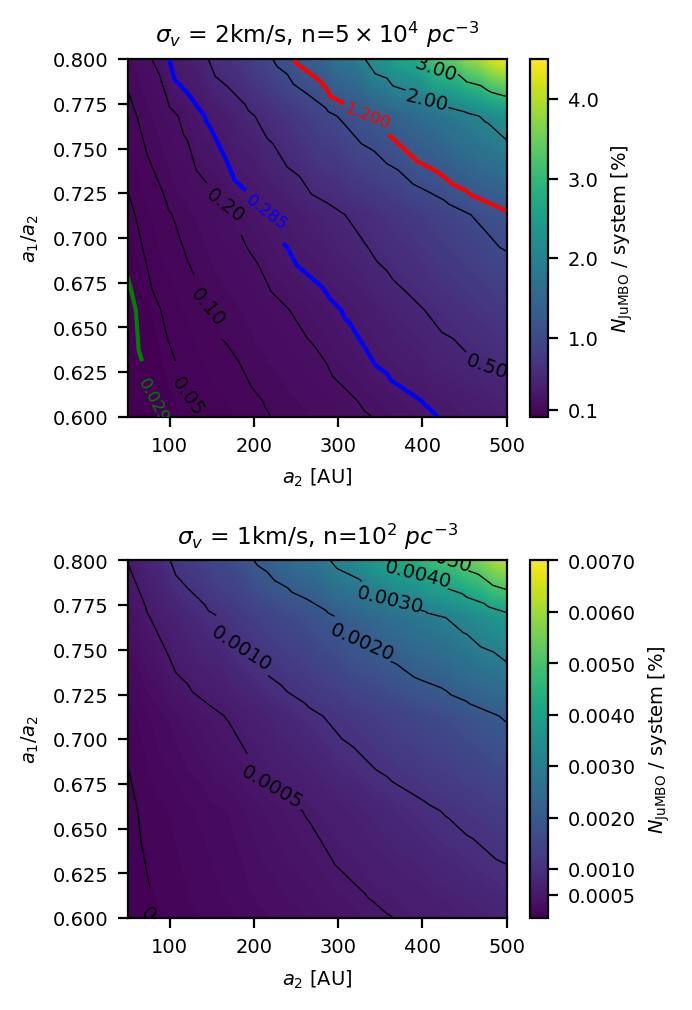

In [272]:
plt.rcParams.update({'font.size': 7})
def mat_interp(v, Sb, Ss, a2, sigma):
    v2 = 30000*np.sqrt(1/a2)
    q = sigma/v2

    idx = 0
    for i in range(len(v)-1):
        if v[i] < q and q < v[i+1]:
            idx = i
            break
    sigma_b = Sb[:,idx] + (Sb[:,idx+1]-Sb[:,idx])/(np.log10(v[idx+1])-np.log10(v[idx]))*(np.log10(q)-np.log10(v[idx]))
    sigma_s = Ss[:,idx] + (Ss[:,idx+1]-Ss[:,idx])/(np.log10(v[idx+1])-np.log10(v[idx]))*(np.log10(q)-np.log10(v[idx]))  
    return sigma_b, sigma_s
        
def draw_2d_rate(qv,qa):
    AU = 1.5e11
    yr = 365*24*3600
    
    pc =3.086e+16 
    t = 1e6*yr

    sigmas = [2000,1000]
    ns = [50000/pc**3,100/pc**3]
   
    
    clvs = [np.linspace(0.01,4.5,145), np.linspace(0.00005,0.007,125)]
    blvs = [[0.05,0.1,0.2,0.5,1,2,3], [0.0001,0.0005,0.001,0.002,0.003,0.004,0.005]]
    ticks = [[0.1,1,2,3,4],[0.0005,0.001,0.002,0.003,0.004, 0.005, 0.006, 0.007]]
    titles = [r'$\sigma_v$ = 2km/s, n=$5\times10^4$ $pc^{-3}$', r'$\sigma_v$ = 1km/s, n=$10^2$ $pc^{-3}$']
    fig = plt.figure(figsize=(88*fig_mm,130*fig_mm))
    axs = [fig.add_subplot(len(ns),1,i+1) for i in range(len(ns))]

    
    for ax, n, clv, blv, tick, sigma, title in zip(axs,ns, clvs, blvs, ticks,sigmas, titles):
        a2s = np.linspace(50,500,20)*AU
        colors = cm.plasma(np.linspace(0,0.8,len(a2s)))
        x = []
        y = []
        #z1= []
        z2=[]
        for a2, c in zip(a2s,colors):
            sigma_jumbos, sigma_ffps =mat_interp(qv,sigma_b,sigma_s,a2/AU,sigma)
            Vc = (0.2*pc)**3* 4*np.pi/3

            for q, sigma_ej, sigma_jumbo in zip(qa, sigma_ffps, sigma_jumbos):
                tau_ej = Vc/(sigma_ej*sigma)  
                tt = np.linspace(0,t,1000000)
                f2j = np.exp(-tt/tau_ej)
                #f2j = 1
                #N_jumbo = np.trapz(f2j*sigma_jumbo*n*a2*a2*sigma,tt)

                N_jumbo = np.trapz(f2j*sigma_jumbo*n*a2*a2*sigma,tt)
                x.append(a2/AU)
                y.append(q)
                z2.append(N_jumbo)
        y = np.array(y)
        x = np.array(x)[y>=0.55]
        z2 = np.array(z2)[y>=0.55]
        y = y[y>=0.55]
     
        cs =ax.tricontourf(x,y,np.array(z2)*100,levels=clv)#

        cs3 = ax.tricontour(x,y,np.array(z2)*100,levels=[0.0285,0.285,1.2],colors=['g','b','r'])
        plt.clabel(cs3, inline=True,fontsize=6)
        
        cs2 = ax.tricontour(x,y,np.array(z2)*100,levels=blv,colors='k',linewidths=0.5,norm=mpl.colors.LogNorm())
        plt.clabel(cs2, inline=True)

        cb = plt.colorbar(cs,ticks=tick)
    #cb.set_label(r'$n \times \sigma_v\times \sigma_{\rm JuMBO}\times$ 1Myr')
        cb.set_label(r'$N_{\rm JuMBO}$ / system [%]')

        #ax.set_ylim(0.1,0.75)
        ax.set_ylim(0.6,0.8)
        ax.set_xlabel(r'$a_2$ [AU]')
        ax.set_ylabel(r'$a_1/a_2$')
        ax.set_title(title)
    
    plt.tight_layout()
    plt.savefig('rate.pdf',dpi=500,bbox_inches='tight')
    
draw_2d_rate(f1,f2*f2)

/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_3613/2208317276.py:21: UserWarning: Log scale: values of z <= 0 have been masked
  cs1=ax1.contourf(x,y**2,(sigma_b),levels=lvs,norm=mpl.colors.LogNorm(),extend='both',cmap=cm.jet)
/var/folders/5k/755tmvm129l96bnf2zwbb07m0000gn/T/ipykernel_3613/2208317276.py:32: UserWarning: Log scale: values of z <= 0 have been masked
  cs3 = ax3.contourf(x,y**2,(sigma_b/sigma_s)*100,levels=lvs,extend='both',cmap=cm.jet,norm=mpl.colors.LogNorm())


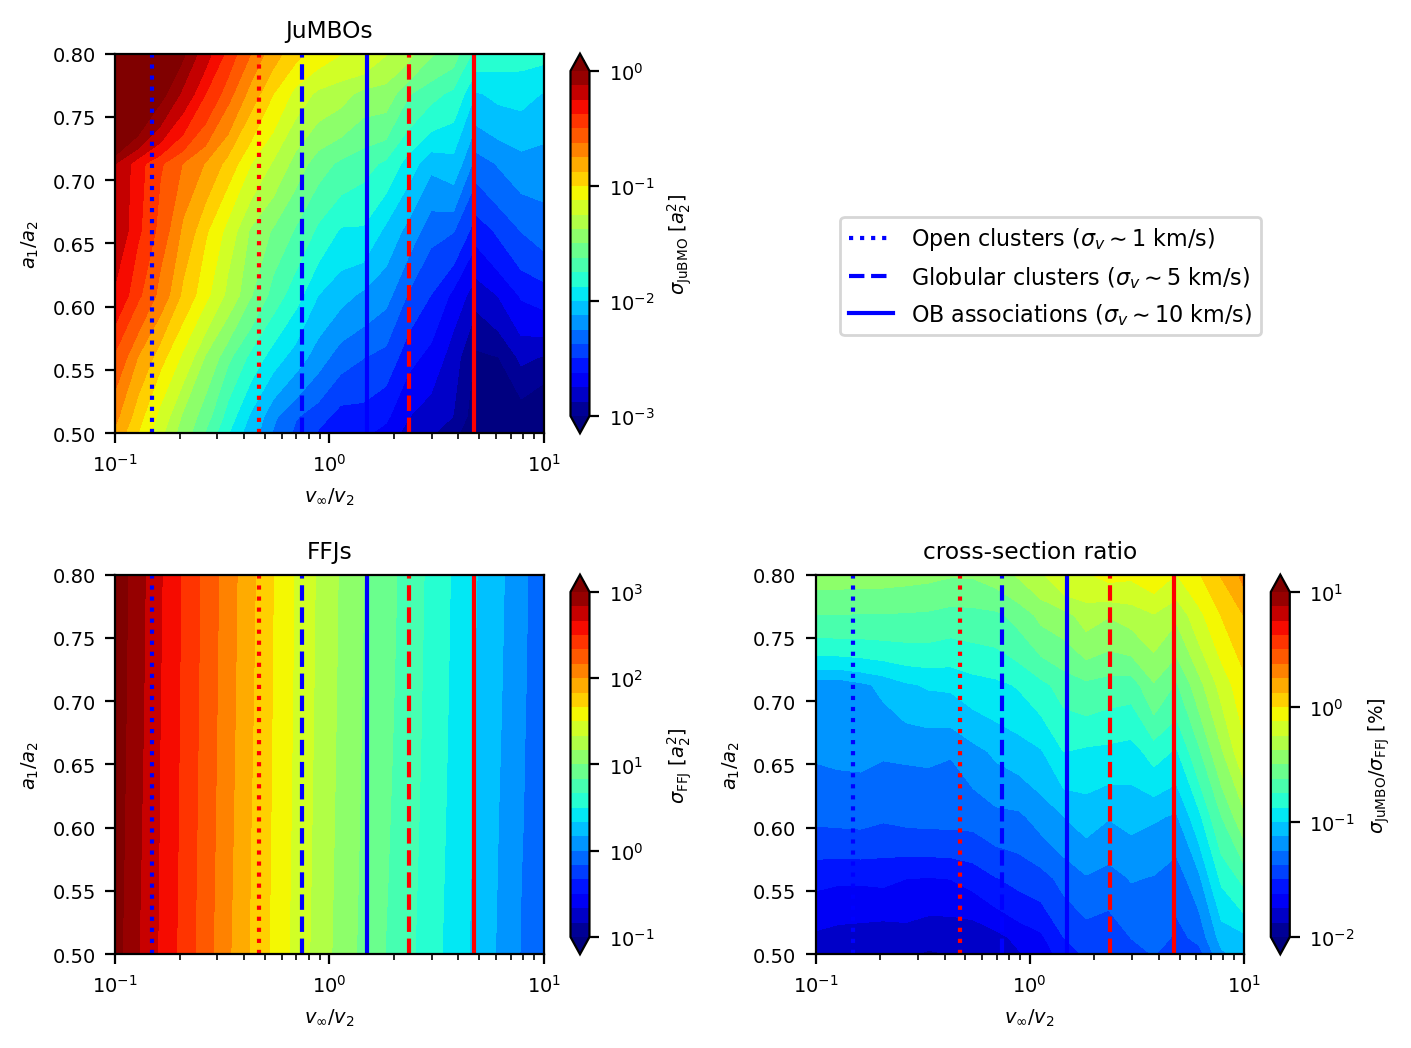

In [256]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})
fig=plt.figure(figsize=(180*fig_mm,135*fig_mm))
ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(224)

cstep = 13
#print(np.linspace(-1,3,25))
lvs = 10**np.linspace(-1,3,25)
cs2 = ax2.contourf(x,y**2,(sigma_s),levels=lvs,norm=mpl.colors.LogNorm(),extend='both',cmap=cm.jet)
#ax1.contour(x,y**2,(sigma_s),levels=10**np.linspace(-1,5,13),norm=mpl.colors.LogNorm(),inline=True,colors='k')
ax2.set_xlabel(r'$v_\infty/v_2$')
ax2.set_ylabel(r'$a_1/a_2$')
ax2.set_xscale('log')
cb2 = plt.colorbar(cs2,ax=ax2,ticks=[1e-1,1e0,1e1,1e2,1e3,1e4,1e5])
cb2.set_label(r'$\sigma_{\rm FFJ}$ [$a_2^2$]')
ax2.set_title('FFJs')

lvs = 10**np.linspace(-3,0,25)
cs1=ax1.contourf(x,y**2,(sigma_b),levels=lvs,norm=mpl.colors.LogNorm(),extend='both',cmap=cm.jet)
#ax2.contour(x,y**2,(sigma_b),levels=10**np.linspace(-1,5,13),norm=mpl.colors.LogNorm(),inline=True,colors='k')
ax1.set_xlabel(r'$v_\infty/v_2$')
ax1.set_ylabel(r'$a_1/a_2$')
ax1.set_xscale('log')
cb1=plt.colorbar(cs1,ax=ax1,ticks=[1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1])#
cb1.set_label(r'$\sigma_{\rm JuBMO}$ [$a_2^2$]')
ax1.set_title('JuMBOs')

#print((sigma_b/sigma_s).max()*100)
lvs = 10**np.linspace(-2,1,25)
cs3 = ax3.contourf(x,y**2,(sigma_b/sigma_s)*100,levels=lvs,extend='both',cmap=cm.jet,norm=mpl.colors.LogNorm())
#cs33 = ax3.contour(x,y**2,(sigma_b/sigma_s)*100,levels=[0.05,0.1,0.2,0.5,1],colors='k',extend='both',norm=mpl.colors.LogNorm(),lw=1)
#plt.clabel(cs33, inline=True,colors='k',fontsize=7)
ax3.set_xlabel(r'$v_\infty/v_2$')
ax3.set_ylabel(r'$a_1/a_2$')
ax3.set_xscale('log')
cb3 = plt.colorbar(cs3,ax=ax3,ticks=[1e-4,1e-3,1e-2,1e-1,1e0,1e1])#
cb3.set_label(r'$\sigma_{\rm JuMBO}/\sigma_{\rm FFJ}$ [%]')
ax3.set_title('cross-section ratio')

plt.tight_layout()

ax1.axvline(np.sqrt(2)*1/(30/np.sqrt(10)),color='b',ls=':',label=r'Open clusters ($\sigma_v\sim 1$ km/s)')
ax1.axvline(np.sqrt(2)*5/(30/np.sqrt(10)),color='b',ls='--',label=r'Globular clusters ($\sigma_v\sim 5$ km/s)')
ax1.axvline(np.sqrt(2)*10/(30/np.sqrt(10)),color='b',ls='-',label=r'OB associations ($\sigma_v\sim 10$ km/s)')

ax1.axvline(np.sqrt(2)*1/(30/np.sqrt(100)),color='r',ls=':')
ax1.axvline(np.sqrt(2)*5/(30/np.sqrt(100)),color='r',ls='--')
ax1.axvline(np.sqrt(2)*10/(30/np.sqrt(100)),color='r',ls='-')
ax1.legend(fontsize=8,bbox_to_anchor=(2.7, .6))

ax2.axvline(np.sqrt(2)*1/(30/np.sqrt(10)),color='b',ls=':')
ax2.axvline(np.sqrt(2)*5/(30/np.sqrt(10)),color='b',ls='--')
ax2.axvline(np.sqrt(2)*10/(30/np.sqrt(10)),color='b',ls='-')

ax2.axvline(np.sqrt(2)*1/(30/np.sqrt(100)),color='r',ls=':')
ax2.axvline(np.sqrt(2)*5/(30/np.sqrt(100)),color='r',ls='--')
ax2.axvline(np.sqrt(2)*10/(30/np.sqrt(100)),color='r',ls='-')


ax3.axvline(np.sqrt(2)*1/(30/np.sqrt(10)),color='b',ls=':')
ax3.axvline(np.sqrt(2)*5/(30/np.sqrt(10)),color='b',ls='--')
ax3.axvline(np.sqrt(2)*10/(30/np.sqrt(10)),color='b',ls='-')

ax3.axvline(np.sqrt(2)*1/(30/np.sqrt(100)),color='r',ls=':')
ax3.axvline(np.sqrt(2)*5/(30/np.sqrt(100)),color='r',ls='--')
ax3.axvline(np.sqrt(2)*10/(30/np.sqrt(100)),color='r',ls='-')

ymax = 0.8
ax1.set_ylim(0.5, ymax)
ax2.set_ylim(0.5, ymax)
ax3.set_ylim(0.5, ymax)
plt.savefig('cross-sections.pdf',dpi=500,bbox_inches='tight')

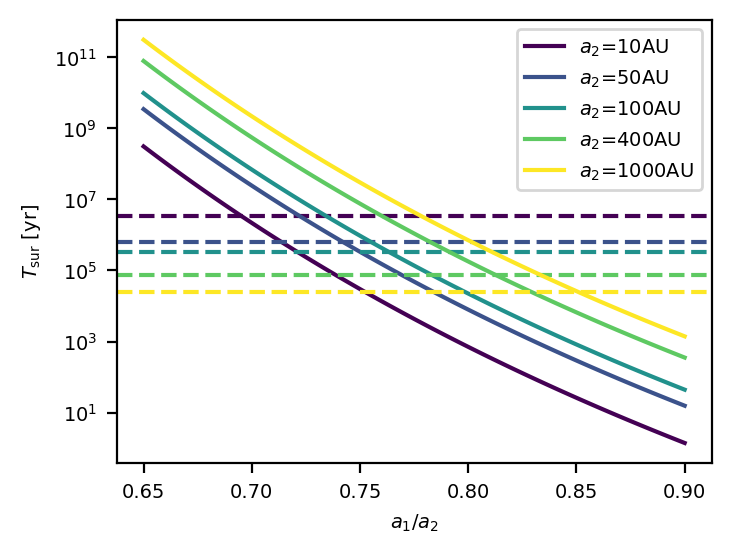

In [131]:
mp= 1e-3
ms = 1
pc = 3.086e+16
au = 1.5e11
n = 5e4/pc**3
v = 1e3
a2s = [10,50,100,400,1000]
colors = cm.viridis(np.linspace(0,1,len(a2s)))
plt.figure(figsize=(4.8*0.8,3.6*0.8))
for a2 ,c in zip(a2s,colors):
    v2 = 30000*np.sqrt(1/a2)
    xx = v/v2

    sigma_c = np.pi * a2*a2 *au*au * np.interp(xx,x[0,:],sigma_s[0,:])

    t_close = 1/ (n * v * sigma_c)

    a1 = np.linspace(0.65,0.9,100)*a2



    D = (a2-a1)/a1
    P1 = a1**(1.5)
    Tsur = 10**( -np.log10(mp/ms) - 6.51 + 3.56*(ms/mp)**(1.0/4)* D )*P1

    plt.plot(a1/a2,Tsur,label='$a_2$='+str(a2)+'AU',color=c)
    plt.axhline(t_close/3.154e+7,ls='--',color=c)
plt.yscale('log')
plt.legend()
plt.xlabel(r'$a_1/a_2$')
plt.ylabel(r'$T_{\rm sur}$ [yr]')
plt.savefig('time-sur.png',dpi=500,bbox_inches='tight')

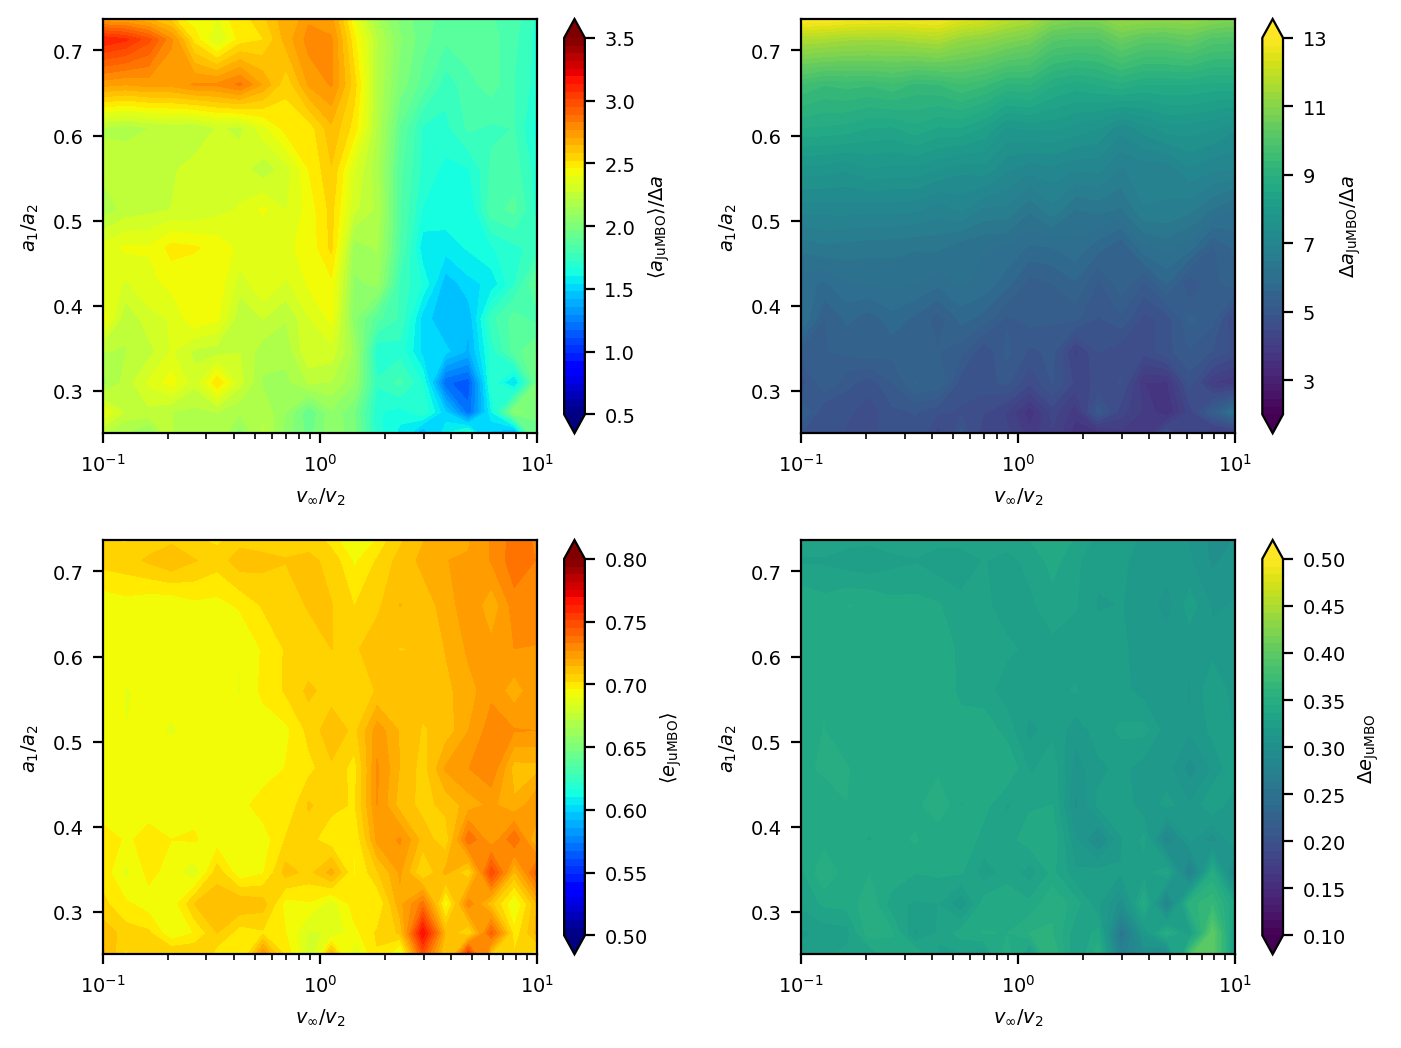

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})
fig=plt.figure(figsize=(180*fig_mm,135*fig_mm))
#fig=plt.figure(figsize=(88*fig_mm,88*fig_mm))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

lv= np.linspace(0.5,3.5,50)
cs1 = ax1.contourf(x,y**2,10**(a_b)/(1-y**2),levels=lv,extend='both',cmap=cm.jet)
ax1.set_xlabel(r'$v_\infty/v_2$')
ax1.set_ylabel(r'$a_1/a_2$')
ax1.set_xscale('log')
cb1 = plt.colorbar(cs1,ax=ax1,ticks=[0.5,1,1.5,2,2.5,3,3.5])
cb1.set_label(r'$\langle a_{\rm JuMBO}\rangle/\Delta a$')

lv = np.linspace(2,13,50)
cs2 = ax2.contourf(x,y**2,10**(a_std)/(1-y**2),levels=lv,extend='both',cmap=cm.viridis)
ax2.set_xlabel(r'$v_\infty/v_2$')
ax2.set_ylabel(r'$a_1/a_2$')
ax2.set_xscale('log')
cb2 = plt.colorbar(cs2,ax=ax2,ticks=[3,5,7,9,11,13])
cb2.set_label(r'$\Delta a_{\rm JuMBO}/\Delta a$')


lv = np.linspace(0.5,0.8,50)
cs3=ax3.contourf(x,y**2,(e_b),levels=lv,cmap=cm.jet,extend='both')
ax3.set_xlabel(r'$v_\infty/v_2$')
ax3.set_ylabel(r'$a_1/a_2$')
ax3.set_xscale('log')
cb3=plt.colorbar(cs3,ax=ax3,ticks = [0.5,0.55,0.6,0.65,0.7,0.75,0.8])
cb3.set_label(r'$\langle e_{\rm JuMBO} \rangle$')


lv=np.linspace(0.1,0.5,50)
cs4=ax4.contourf(x,y**2,(e_std)/e_b,levels=lv,extend='both',cmap=cm.viridis)
ax4.set_xlabel(r'$v_\infty/v_2$')
ax4.set_ylabel(r'$a_1/a_2$')
ax4.set_xscale('log')
cb4=plt.colorbar(cs4,ax=ax4,ticks=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
cb4.set_label(r'$\Delta e_{\rm JuMBO}$')
plt.tight_layout()

axs = [ax1,ax2,ax3,ax4]
for ax in axs:
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ymax = 0.737
    ymin = 0.25
    xy = (xmin,ymin)
    width = xmax - xmin
    height = ymax - ymin
    ax.set_ylim(ymin,ymax)

# create the patch and place it in the back of countourf (zorder!)
    #p = patches.Rectangle(xy, width, height, hatch='//////', fill=None, zorder=-10)
    #ax.add_patch(p)
plt.savefig('ae.pdf',dpi=500,bbox_inches='tight')

In [58]:
import numpy as np
def calc_stat(fname):
    f1 = np.linspace(0,180,21)
    f2 = np.linspace(0,180,21)
    x,y=np.meshgrid(f1,f2)
    sigma_s = np.zeros(x.shape)
    sigma_b = np.zeros(x.shape)
    a_b = np.zeros(x.shape)
    e_b = np.zeros(x.shape)
    a_std = np.zeros(x.shape)
    e_std = np.zeros(x.shape)
    a2 = 10

    dd = np.loadtxt(fname)
    for i in range (441):
        line = dd[i,:]
        idx1 = int(line[0]/9)
        idx2 = int(line[1]/9)
        bmax = line[2]
        aave = line[3]
        astd = line[4]
        eave = line[5]
        estd = line[6]
        N = line[7]
        ns = line[10] + line[11] + line[14] + line[15] + 2*line[17]
        nb = line[18]
        sigma_s[idx2,idx1] = ns*np.pi*bmax**2/a2**2/(N)
        sigma_b[idx2,idx1] = nb*np.pi*bmax**2/a2**2/(N)
        a_b[idx2,idx1] = aave
        e_b[idx2,idx1] = eave
        a_std[idx2,idx1] = astd
        e_std[idx2,idx1] = estd
    return x ,y, sigma_s, sigma_b, a_b, e_b, a_std, e_std
    

In [59]:
x01, y01, sigma_s01, sigma_b01, a_b01, e_b01, a_std01, e_std01 = calc_stat('stat-angle/angle-stat-01.txt')
x1, y1, sigma_s1, sigma_b1, a_b1, e_b1, a_std1, e_std1 = calc_stat('stat-angle/angle-stat-1.txt')
x10, y10, sigma_s10, sigma_b10, a_b10, e_b10, a_std10, e_std01 = calc_stat('stat-angle/angle-stat-10.txt')

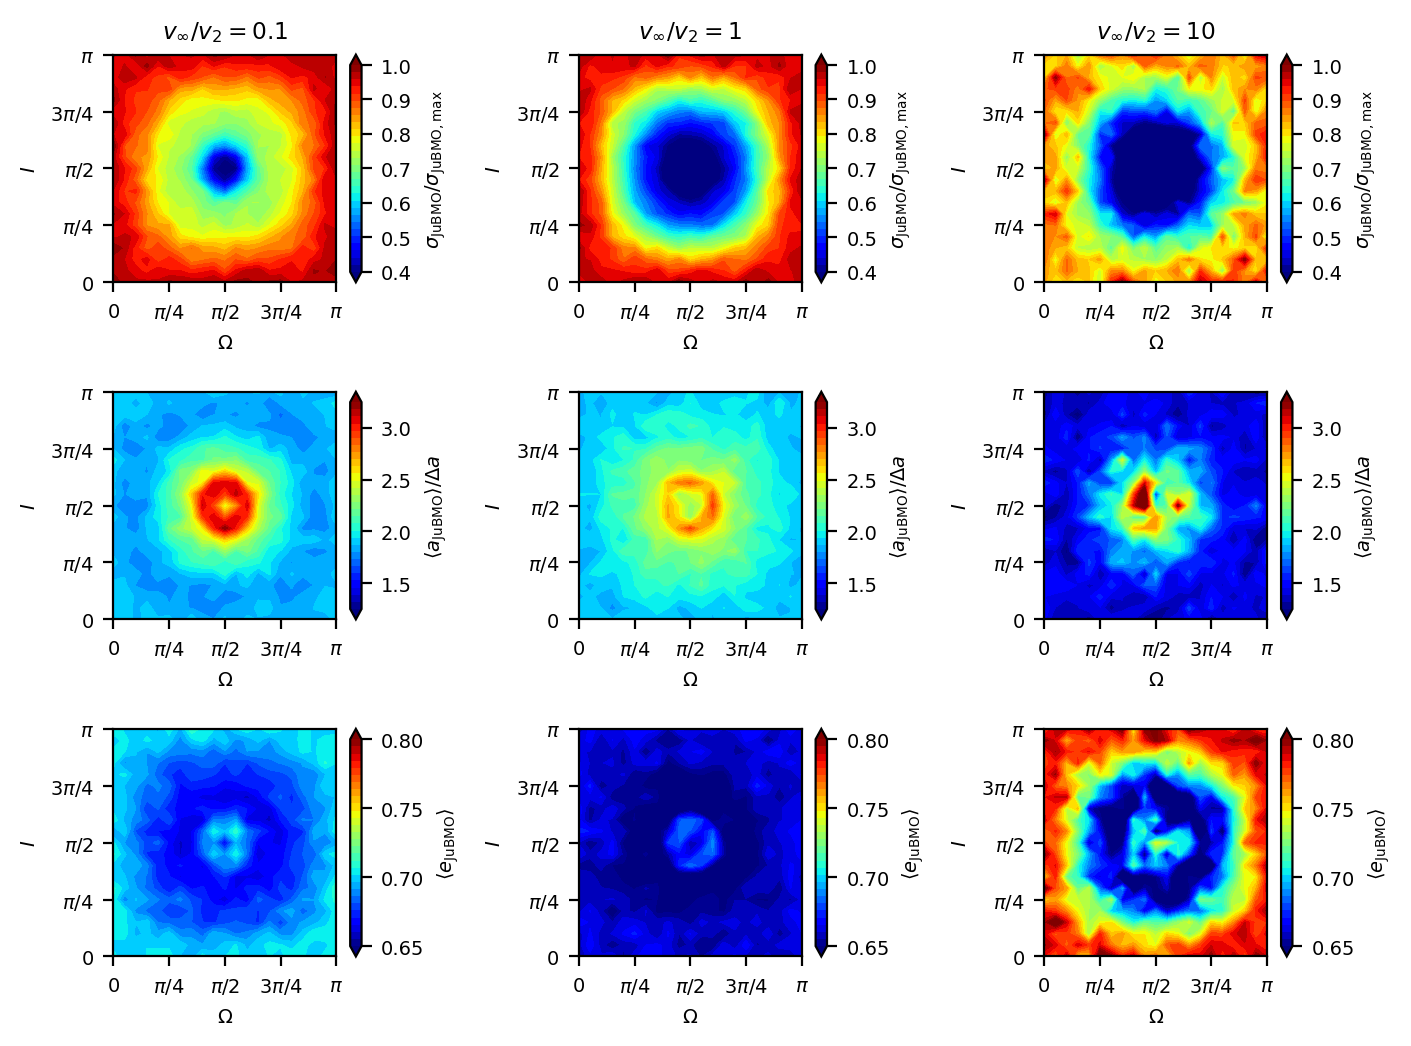

In [60]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})
fig=plt.figure(figsize=(180*fig_mm,135*fig_mm))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

flv = np.linspace(0.4,1,30)
cs1 = ax1.contourf(y01*np.pi/180,x01*np.pi/180,(sigma_b01/sigma_b01.max()),levels=flv,extend='both',cmap=cm.jet)

fticks=[0.4,0.5,0.6,0.7,0.8,0.9,1]
fblabel = r'$\sigma_{\rm JuBMO}/\sigma_{\rm JuBMO,max}$'
cb1 = plt.colorbar(cs1,ax=ax1,ticks=fticks)
cb1.set_label(fblabel)

cs2 = ax2.contourf(y1*np.pi/180,x1*np.pi/180,(sigma_b1/sigma_b1.max()),levels=flv,extend='both',cmap=cm.jet)
cb2 = plt.colorbar(cs2,ax=ax2,ticks=fticks)
cb2.set_label(fblabel)

cs3 = ax3.contourf(y10*np.pi/180,x10*np.pi/180,(sigma_b10/sigma_b10.max()),levels=flv,extend='both',cmap=cm.jet)
cb3 = plt.colorbar(cs3,ax=ax3,ticks=fticks)
cb3.set_label(fblabel)

f22 = 0.8
alv = np.linspace(0.25,0.65,30)/(1-f22)
aticks = [1.5,2,2.5,3]

ablabel = r'$\langle a_{\rm JuBMO}\rangle/\Delta a$'
cs4 = ax4.contourf(y01*np.pi/180,x01*np.pi/180,10**(a_b01)/(1-f22),levels=alv,extend='both',cmap=cm.jet)
cb4 = plt.colorbar(cs4,ax=ax4,ticks=aticks)
cb4.set_label(ablabel)

cs5 = ax5.contourf(y1*np.pi/180,x1*np.pi/180,10**(a_b1)/(1-f22),levels=alv,extend='both',cmap=cm.jet)
cb5 = plt.colorbar(cs5,ax=ax5,ticks=aticks)
cb5.set_label(ablabel)

cs6 = ax6.contourf(y10*np.pi/180,x10*np.pi/180,10**(a_b10)/(1-f22),levels=alv,extend='both',cmap=cm.jet)
cb6 = plt.colorbar(cs6,ax=ax6,ticks=aticks)
cb6.set_label(ablabel)


elv = np.linspace(0.65,0.8,30)
eticks=[0.65,0.7,0.75,0.8]
eblabel = r'$\langle e_{\rm JuBMO} \rangle$'
cs7 = ax7.contourf(y01*np.pi/180,x01*np.pi/180,(e_b01),levels=elv,extend='both',cmap=cm.jet)
cb7 = plt.colorbar(cs7,ax=ax7,ticks=eticks)
cb7.set_label(eblabel)

cs8 = ax8.contourf(y1*np.pi/180,x1*np.pi/180,(e_b1),levels=elv,extend='both',cmap=cm.jet)
cb8 = plt.colorbar(cs8,ax=ax8,ticks=eticks)
cb8.set_label(eblabel)

cs9 = ax9.contourf(y10*np.pi/180,x10*np.pi/180,(e_b10),levels=elv,extend='both',cmap=cm.jet)
cb9 = plt.colorbar(cs9,ax=ax9,ticks=eticks)
cb9.set_label(eblabel)


ax1.set_title(r'$v_\infty/v_2=0.1$')
ax2.set_title(r'$v_\infty/v_2=1$')
ax3.set_title(r'$v_\infty/v_2=10$')
for ax in axs:
    ax.set_xlim(0,np.pi)
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    ax.set_xlabel(r'$\Omega$')
    ax.set_ylabel(r'$I$')
    ax.set_xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi],['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
    ax.set_yticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi],['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])

plt.tight_layout()
plt.savefig('Omega-I.pdf',dpi=500,bbox_inches='tight')

In [11]:
def calc_inc_stat(fname):
    x =np.linspace(0,360,121)
    sigma_s = np.zeros(x.shape)
    sigma_b = np.zeros(x.shape)
    a_b = np.zeros(x.shape)
    e_b = np.zeros(x.shape)
    a_std = np.zeros(x.shape)
    e_std = np.zeros(x.shape)
    a2 = 10

    dd = np.loadtxt(fname)
    for i in range (121):
        line = dd[i,:]
        idx1 = int(line[0]/3)
        idx2 = int(line[1]/3)
        bmax = line[2]
        aave = line[3]
        astd = line[4]
        eave = line[5]
        estd = line[6]
        N = line[7]
        ns = line[10] + line[11] + line[14] + line[15] + 2*line[17]
        nb = line[18]
        sigma_s[idx1] = ns*np.pi*bmax/a2/(N)
        sigma_b[idx1] = nb*np.pi*bmax/a2/(N)
        a_b[idx1] = aave
        e_b[idx1] = eave
        a_std[idx1] = astd
        e_std[idx1] = estd

    return x, sigma_s, sigma_b, a_b, e_b, a_std, e_std

In [12]:
x01, sigma_s01, sigma_b01, a_b01, e_b01, a_std01, e_std01 = calc_inc_stat('inc-stat-01.txt')
x1, sigma_s1, sigma_b1, a_b1, e_b1, a_std1, e_std1 = calc_inc_stat('inc-stat-1.txt')
x10, sigma_s10, sigma_b10, a_b10, e_b10, a_std10, e_std10 = calc_inc_stat('inc-stat-10.txt')

In [15]:

def load_dist_data():
    ab = []
    eb = []
    bb = []
    vb = []
    for i in [0,6,12,18]:
        fname = 'data/full-'+str(i)+'-17.txt'
        d = np.loadtxt(fname)
        stat = d[:,0]
        b = d[:,2]
        ap = d[:,3]
        ep = d[:,4]
        #vp = d[:,5]
        ab.append(ap[stat==9])
        eb.append(ep[stat==9])
        bb.append(b[stat==9])
        #vp.append(vp[stat==9])
    return ab, eb, bb, 0

In [16]:
a_list,e_list,b_list, v_list = load_dist_data()

In [19]:
def load_reply_data(a2):
    ab = []
    eb = []
    bb = []
    vb = []
    vfs = [0.1,1,10]
    vps = []
    stats = []
    for vf in vfs:
        sub = '%.6lf-0.700000-%.6lf'%(vf,a2)+'.txt'
        fname = 'reply/fig5-'+sub
        d = np.loadtxt(fname)
        stat = d[:,0]
        b = d[:,2]
        ap = d[:,3]
        ep = d[:,4]
        vp = d[:,5]
        #ab.append(ap[stat==9])
        #eb.append(ep[stat==9])
        #bb.append(b[stat==9])
        #vps.append(vp)
        stats.append(stat)
        ab.append(ap)
        eb.append(ep)
        bb.append(b)
        vps.append(vp)
    return ab, eb, bb, vps, stats

In [ ]:
a_list,e_list,b_list,v_list,stat_list = load_reply_data(10)

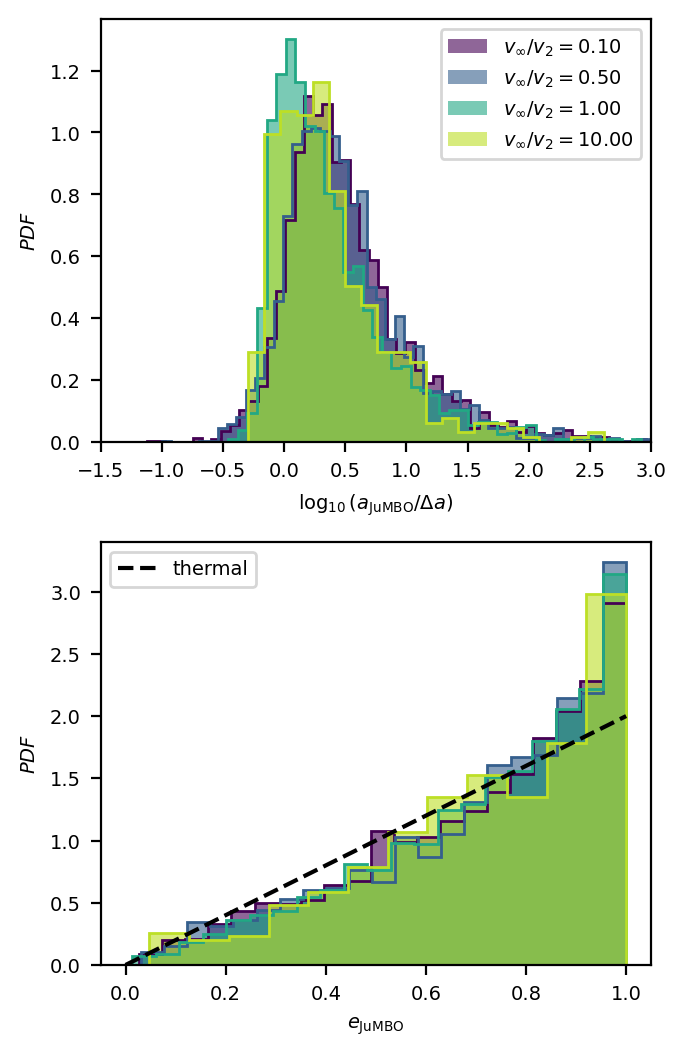

In [25]:
def draw_list(a_list, e_list, b_list, a2):
    M1 = 1
    M2 = 1
    m = 1e-3

    f2max = np.sqrt(1 - 2 * (2 * m / 3 / M1)**( 1.0 / 3))
    idx =[0.1,0.5,1,10]
    N = 20
    f1min = -1
    f1max = 1
    f1 = 10**np.linspace(f1min,f1max,N)

    import matplotlib.pyplot as plt
    plt.rcParams.update({'font.size': 7})
    fig=plt.figure(figsize=(88*fig_mm,135*fig_mm))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)


    colors = cm.viridis(np.linspace(0,0.9,len(a_list)))
    for a , b, c , i in zip(a_list, b_list, colors, idx):
        f = i
        ax1.hist(np.log10(a/(a2*(1-0.7))),bins='auto',density=True,histtype='stepfilled',alpha=0.6,lw=1,color=c,label=r'$v_\infty/v_2=$'+('%.2lf'%(f)))
        ax1.hist(np.log10(a/(a2*(1-0.7))),bins='auto',density=True,histtype='step',lw=1,color=c)
        #ax1.hist(np.log10(a[nimpulse]/a2),bins='auto',density=True,histtype='step',lw=1,color=c,label=r'$v_\infty/v_2=$',ls='--')
    ax1.legend()
    for e, b, c, i in zip(e_list, b_list, colors, idx):
        f = i
        ax2.hist(e,bins='auto',density=True,histtype='stepfilled',alpha=0.6,lw=1,color=c)
        ax2.hist(e,bins='auto',density=True,histtype='step',lw=1,color=c)
        #ax2.hist(e[nimpulse],bins='auto',density=True,histtype='step',lw=1,color=c,label=r'$v_\infty/v_2=$',ls='--')
    ax2.plot(np.linspace(0,1,100),2*np.linspace(0,1,100),'k--',label='thermal')
    ax1.set_xlabel(r'$\log_{10}(a_{\rm JuMBO}/\Delta a)$')
    ax2.set_xlabel(r'$e_{\rm JuMBO}$')
    ax1.set_ylabel(r'$PDF$')
    ax2.set_ylabel(r'$PDF$')
    ax1.set_xlim(-1.5,3)
    ax2.legend()
    plt.tight_layout()
    plt.savefig('dist'+str(a2)+'.pdf',dpi=500,bbox_inches='tight')
draw_list(a_list,e_list,b_list, 10)